# Importando libs e lendo a tabela

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r'C:/Users/Inteli/Downloads/Data Base Full.xlsx')

In [4]:
df = df.drop("Unnamed: 0", axis = 1)

# Para facilitar a compreensão dos dados, podemos observar a concentração dentre os fornecedores, inclusive olhando para a região em que estão presentes

In [7]:
# converting string into categories, and converting these categories into numbers
df['supplier_code'] = df['Normalized Supplier Name'].astype("category").cat.codes

<Axes: >

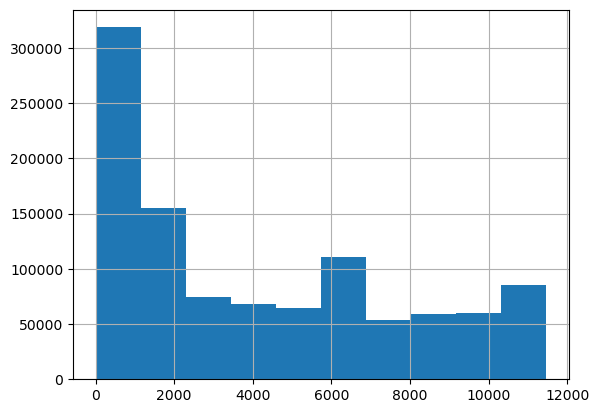

In [8]:
df['supplier_code'].hist(bins=10)

In [11]:
# converting string into categories, and converting these categories into numbers
df['region_code'] = df['Region'].astype("category").cat.codes

In [12]:
df['region_code'].unique()

array([3, 1, 0, 2], dtype=int8)

In [13]:
df['Region'].unique()

array(['NORAM', 'EMEA', 'APAC', 'LATAM'], dtype=object)

In [14]:
i = 0
f = 0
g = 0
h = 0

for e in df['Region']:
    if e == "NORAM":
        i += 1
        
for e in df['Region']:
    if e == "LATAM":
        f += 1
        
for e in df['Region']:
    if e == "EMEA":
        g += 1
    
for e in df['Region']:
    if e == "APAC":
        h += 1

print(f'Dados de LATAM representam {round(f/(i+f+g+h)*100,2)}%')
print(f'Dados de NORAM representam {round(i/(i+f+g+h)*100,2)}%')
print(f'Dados de EMEA representam {round(g/(i+f+g+h)*100,2)}%')
print(f'Dados de APAC representam {round(h/(i+f+g+h)*100,2)}%')

Dados de LATAM representam 2.09%
Dados de NORAM representam 68.93%
Dados de EMEA representam 22.45%
Dados de APAC representam 6.53%


<Axes: >

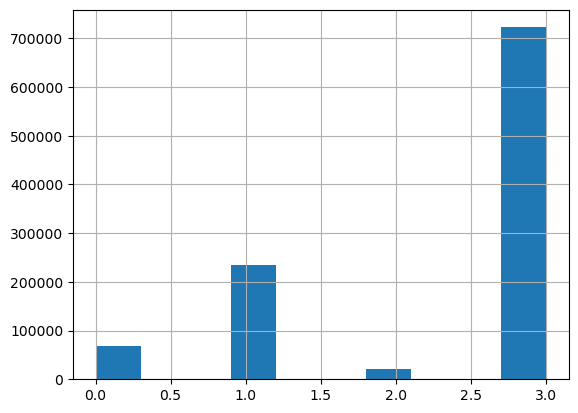

In [15]:
df['region_code'].hist(bins=10)

# Podemos separar os dados em 2, aquelas compras que vieram da Amazon e as compras de outros lugares

In [16]:
# Há uma concentração razoável da Amazon entre seus fornecedores
df['Normalized Supplier Name'].value_counts()

Normalized Supplier Name
AMAZON                       103503
BEELINECOM INC                92163
ALLEGIS GROUP                 87058
MAGNIT LLC                    50345
ALLEGIS GLOBAL SOLUTIONS      24925
                              ...  
LUMINOSO TECHNOLOGIES INC         1
LUMINIT                           1
LUMENFLOW                         1
LUMEN WORLD INC                   1
LEOPARD SOLUTIONS LLC             1
Name: count, Length: 11468, dtype: int64

In [17]:
df_sup_amazon = df[df['Normalized Supplier Name'] == "AMAZON"]
amazon = df_sup_amazon['Normalized Supplier Name'].value_counts().sum()

In [18]:
df_sup_all = df[df['Normalized Supplier Name'] != "AMAZON"]
all_ex_amazon = df_sup_all['Normalized Supplier Name'].value_counts().sum()

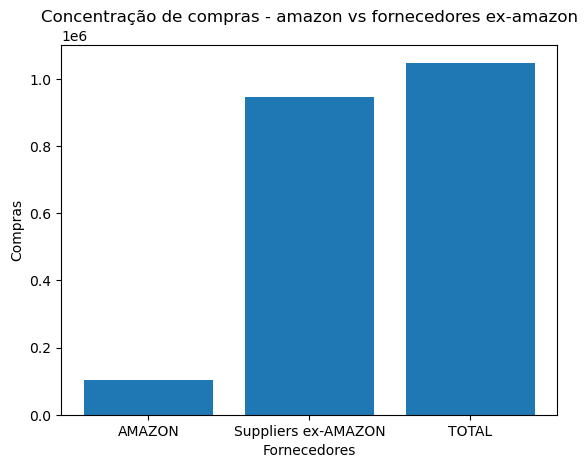

In [19]:
suppliers_df = {"AMAZON": amazon, "Suppliers ex-AMAZON": all_ex_amazon, "TOTAL":amazon+all_ex_amazon}
x = list(suppliers_df.keys())
y = list(suppliers_df.values())
plt.bar(x, y)

plt.xlabel("Fornecedores")
plt.ylabel("Compras")
plt.title("Concentração de compras - amazon vs fornecedores ex-amazon")
plt.show()

In [20]:
print(f'A amazon compõe aproximadamente {round(amazon/(amazon + all_ex_amazon),2)*100}% dos seus fornecedores')

A amazon compõe aproximadamente 10.0% dos seus fornecedores


In [21]:
pd.set_option('display.max_columns', None)

# Entendendo as GL's (General Lenders)

O que são as "GL's"?
- São um conjunto de contas numeradas que a Meta usa para controlar suas transações financeiras, sendo que cada conta se refere a um tipo específico de ativo, passivo, patrimônio líquido, receita ou despesa.
- Durante os registros contábeis podem haver inconsistências
- Quais são os tipos de erros possíveis?
1. Duplicação de contas
2. Omissão
3. Erro de lançamento
4. Reversão de entrada (um lançamento que era p ser débito ocorre no crédito e vice-versa)

In [22]:
df.dropna().head()

,Supplier Name,Normalized Supplier Name,Parent Supplier Name,Region,Requestor Name,Preparer Name,Level 1,Level 2,Level 3,Business Unit,Legal Entity,Cost Center,Cost Center (Base Level),Cost Center (Level 4),Cost Center (Level 5),Cost Center (Level 6),GL Desc (Level 4),GL Desc (Level 5),GL Desc (Level 6),Invoice ID,Invoice Number,Invoice Source,"Month, Day, Year of Payment Date",PO Number,Amount (USD),supplier_code,region_code
1,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Cara Brann,Jessica Shimshak,"Sales, Marketing & Events",Original Content,Original Content,R&D,"Meta Platforms, Inc.",5030 - DES(Facebook Org Central XFN),DES(Facebook Org Central XFN),Facebook R&D,Research & Development,Parent for Cost Center,Creative services,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002890508241,FBAPPRFP001,SUPP_CONNECT,2023-09-28,7.000079e+10,349101.75,19,3
2,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Chloe Kwock,Nicole Franco,"Sales, Marketing & Events",Original Content,Original Content,Global Consumer Marketing,"Meta Platforms, Inc.",2524 - Marketing - Creative,Marketing - Creative,Marketing & GX M&S,Marketing & Sales,Parent for Cost Center,Marketing Materials,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002731100946,AWTYCASESTUDY005,SUPP_CONNECT,2023-05-13,7.000067e+10,6936.00,19,3
3,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Chloe Kwock,Princess Costello,"Sales, Marketing & Events",Original Content,Original Content,Global Consumer Marketing,"Meta Platforms, Inc.",2523 - Marketing - Company Brand,Marketing - Company Brand,Marketing & GX M&S,Marketing & Sales,Parent for Cost Center,Consultants,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002818756646,DCRMETAVERSEAWTY002,SIMANUAL,2023-08-10,7.000049e+10,-231826.73,19,3
4,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Jess Jabbar,Princess Costello,"Sales, Marketing & Events",Original Content,Original Content,Global Consumer Marketing,"Meta Platforms, Inc.",2524 - Marketing - Creative,Marketing - Creative,Marketing & GX M&S,Marketing & Sales,Parent for Cost Center,Other Marketing,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002613103245,AWTYCASESTUDY001,SUPP_CONNECT,2023-02-16,7.000063e+10,55000.00,19,3
5,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Kiana Garner,Nicole Franco,"Sales, Marketing & Events",Original Content,Original Content,Whatsapp,"Meta Platforms, Inc.",2939 - Marketing - WhatsApp,Marketing - WhatsApp,Marketing & GX M&S,Marketing & Sales,Parent for Cost Center,Creative services,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002847539815,WACHANNELS001,SUPP_CONNECT,2023-08-12,7.000074e+10,19796.00,19,3


Uma coisa que acho estranha é a conta "Consultants" estar atrelada a Marketing & Sales e não a Research & Development

In [23]:
df['GL Desc (Level 4)'].unique()

array(['Current Liabilities', 'Creative services', 'Marketing Materials',
       'Consultants', 'Other Marketing', 'Equipment R&D',
       'Revenue - Marketplace Incentives (Contra-Rev)',
       'Prepaid Exp. & Other Current Assets',
       'Creative Shop Pass Through', 'Equipment < $25K',
       'Public relations', 'Company Events', 'Data Center Sustainability',
       'Fixed Assets - Gross', 'Off-Premise Software', 'Content Expense',
       'Data Center Site Development', 'Misc office expenses',
       'Net Zero Program', 'Outsourced Services',
       'COR - Content Acquisition', 'Vending',
       'Equipment repairs & maintenance', 'Data Center Facilities',
       'Conferences', 'Kitchen - Catering', 'Non-Charitable Donations',
       'Marketing events', 'Leadership Offsites', 'Postage and courier',
       'Shuttle Service', 'COGS - Support and maintenance',
       'Professional dues & subs',
       'COGS - Connectivity & bandwidth (PoP)', 'Market research',
       'Contra Revenue - 

In [24]:
df['GL Desc (Level 5)'].unique()

array(['Total Liabilities', 'Opex w/o Allocations & Interco',
       'Revenue Payments & Other', 'Current Assets', 'Indirect COGS',
       'Fixed Assets, Net', 'Direct COGS', 'Other Assets',
       'Other Income & Expense', 'Revenue Ads', nan], dtype=object)

In [25]:
df['GL Desc (Level 6)'].unique()

array(["Total Liabilities & Shareholders' Equity",
       'Operating Expenses w/o Allocations', 'Total Revenue',
       'Total Assets', 'Cost of Goods Sold', 'Income before Taxes',
       'OIE - Other Gain', 'Provision for Income Taxes'], dtype=object)

**Possível vulnerabilidade na célula abaixo, investigar!**

In [26]:
# Assets = Liabilities + Equity
# ou seja, o montante entre ativos tem que ser igual ao de passivos + pl
df['GL Desc (Level 6)'].value_counts()['Total Assets'] == df['GL Desc (Level 6)'].value_counts()["Total Liabilities & Shareholders' Equity"]

False

In [27]:
df_currentLiabilities = df[df['GL Desc (Level 4)'] == "Current Liabilities"]

In [28]:
(df['GL Desc (Level 4)'] == "Current Liabilities").value_counts()

GL Desc (Level 4)
False    998535
True      50040
Name: count, dtype: int64

In [29]:
df[df['GL Desc (Level 6)'] == "Cost of Goods Sold"].head()

,Supplier Name,Normalized Supplier Name,Parent Supplier Name,Region,Requestor Name,Preparer Name,Level 1,Level 2,Level 3,Business Unit,Legal Entity,Cost Center,Cost Center (Base Level),Cost Center (Level 4),Cost Center (Level 5),Cost Center (Level 6),GL Desc (Level 4),GL Desc (Level 5),GL Desc (Level 6),Invoice ID,Invoice Number,Invoice Source,"Month, Day, Year of Payment Date",PO Number,Amount (USD),supplier_code,region_code
46,3BL MEDIA INC,3BL MEDIA INC,"3bl Media, LLC",NORAM,Marlo Tablante,Shivam Vakil,Energy & Utilities,Waste Management,Waste Disposal,Infrastructure,"Meta Platforms, Inc.","4350 - Design, Engineering & Construction Group","Design, Engineering & Construction Group",Infra R&D,Research & Development,Parent for Cost Center,Data Center Sustainability,Indirect COGS,Cost of Goods Sold,300002724744720,32840,SUPP_CONNECT,2023-05-11,7.000029e+10,11937.5,45,3
47,3BL MEDIA INC,3BL MEDIA INC,"3bl Media, LLC",NORAM,Marlo Tablante,Shivam Vakil,Professional Services,Public Relations,General Public Relations Programs & Services,Infrastructure,"Meta Platforms, Inc.","4350 - Design, Engineering & Construction Group","Design, Engineering & Construction Group",Infra R&D,Research & Development,Parent for Cost Center,Data Center Sustainability,Indirect COGS,Cost of Goods Sold,300002678259821,32271032272,SUPP_CONNECT,2023-04-13,7.000066e+10,30495.0,45,3
140,3DEGREES GROUP INC,3DEGREES GROUP INC,"3degrees Group, Inc.",NORAM,Amanda Yang,Shivam Vakil,Real Estate & Facilities,Construction,Datacenter Cabling Installation & Maintenance,Infrastructure,"Meta Platforms, Inc.","4350 - Design, Engineering & Construction Group","Design, Engineering & Construction Group",Infra R&D,Research & Development,Parent for Cost Center,Data Center Site Development,Indirect COGS,Cost of Goods Sold,300002581337208,3D2893MET,SUPP_CONNECT,2023-02-18,7.000019e+10,18262.5,50,3
141,3DEGREES GROUP INC,3DEGREES GROUP INC,"3degrees Group, Inc.",NORAM,Amanda Yang,Shivam Vakil,Real Estate & Facilities,Construction,Datacenter Cabling Installation & Maintenance,Infrastructure,"Meta Platforms, Inc.","4350 - Design, Engineering & Construction Group","Design, Engineering & Construction Group",Infra R&D,Research & Development,Parent for Cost Center,Data Center Site Development,Indirect COGS,Cost of Goods Sold,300002617414110,3D2906MET,SUPP_CONNECT,2023-03-04,7.000019e+10,1937.5,50,3
142,3DEGREES GROUP INC,3DEGREES GROUP INC,"3degrees Group, Inc.",NORAM,Amanda Yang,Shivam Vakil,Real Estate & Facilities,Construction,Datacenter Cabling Installation & Maintenance,Infrastructure,"Meta Platforms, Inc.","4350 - Design, Engineering & Construction Group","Design, Engineering & Construction Group",Infra R&D,Research & Development,Parent for Cost Center,Data Center Site Development,Indirect COGS,Cost of Goods Sold,300002661750860,3D2941MET,SUPP_CONNECT,2023-04-06,7.000019e+10,3300.0,50,3


In [30]:
conta = 50040/(50040+998535)
print(f'{round(conta*100,2)}%')

4.77%


In [31]:
i = 0
for c in df_currentLiabilities['GL Desc (Level 5)']:
    if c == "Total Liabilities":
        i += 1
print(i)
print("Para todo item que está associado aos passivos circulantes, eles são considerados na categoria de Passivos Totais")

50040
Para todo item que está associado aos passivos circulantes, eles são considerados na categoria de Passivos Totais


In [32]:
df[df['GL Desc (Level 4)'] == "Creative services"].head(1)

,Supplier Name,Normalized Supplier Name,Parent Supplier Name,Region,Requestor Name,Preparer Name,Level 1,Level 2,Level 3,Business Unit,Legal Entity,Cost Center,Cost Center (Base Level),Cost Center (Level 4),Cost Center (Level 5),Cost Center (Level 6),GL Desc (Level 4),GL Desc (Level 5),GL Desc (Level 6),Invoice ID,Invoice Number,Invoice Source,"Month, Day, Year of Payment Date",PO Number,Amount (USD),supplier_code,region_code
1,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Cara Brann,Jessica Shimshak,"Sales, Marketing & Events",Original Content,Original Content,R&D,"Meta Platforms, Inc.",5030 - DES(Facebook Org Central XFN),DES(Facebook Org Central XFN),Facebook R&D,Research & Development,Parent for Cost Center,Creative services,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002890508241,FBAPPRFP001,SUPP_CONNECT,2023-09-28,7.000079e+10,349101.75,19,3


In [33]:
(df['GL Desc (Level 4)'] == "Creative services").value_counts()

GL Desc (Level 4)
False    1045927
True        2648
Name: count, dtype: int64

In [34]:
df = df.dropna(axis=0)

In [35]:
df['Cost Center (Level 5)'].unique()

array(['Research & Development', 'Marketing & Sales',
       'General & Administrative'], dtype=object)

In [36]:
df['Cost Center (Level 6)'].unique() # por mim pode tirar essa coluna

array(['Parent for Cost Center'], dtype=object)

In [37]:
df[df['GL Desc (Level 6)'] == "Total Revenue"]['Cost Center (Level 5)'].value_counts()

Cost Center (Level 5)
Research & Development    86
Marketing & Sales         19
Name: count, dtype: int64

In [38]:
df[df['GL Desc (Level 6)'] == "Operating Expenses w/o Allocations"].head()

,Supplier Name,Normalized Supplier Name,Parent Supplier Name,Region,Requestor Name,Preparer Name,Level 1,Level 2,Level 3,Business Unit,Legal Entity,Cost Center,Cost Center (Base Level),Cost Center (Level 4),Cost Center (Level 5),Cost Center (Level 6),GL Desc (Level 4),GL Desc (Level 5),GL Desc (Level 6),Invoice ID,Invoice Number,Invoice Source,"Month, Day, Year of Payment Date",PO Number,Amount (USD),supplier_code,region_code
1,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Cara Brann,Jessica Shimshak,"Sales, Marketing & Events",Original Content,Original Content,R&D,"Meta Platforms, Inc.",5030 - DES(Facebook Org Central XFN),DES(Facebook Org Central XFN),Facebook R&D,Research & Development,Parent for Cost Center,Creative services,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002890508241,FBAPPRFP001,SUPP_CONNECT,2023-09-28,7.000079e+10,349101.75,19,3
2,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Chloe Kwock,Nicole Franco,"Sales, Marketing & Events",Original Content,Original Content,Global Consumer Marketing,"Meta Platforms, Inc.",2524 - Marketing - Creative,Marketing - Creative,Marketing & GX M&S,Marketing & Sales,Parent for Cost Center,Marketing Materials,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002731100946,AWTYCASESTUDY005,SUPP_CONNECT,2023-05-13,7.000067e+10,6936.00,19,3
3,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Chloe Kwock,Princess Costello,"Sales, Marketing & Events",Original Content,Original Content,Global Consumer Marketing,"Meta Platforms, Inc.",2523 - Marketing - Company Brand,Marketing - Company Brand,Marketing & GX M&S,Marketing & Sales,Parent for Cost Center,Consultants,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002818756646,DCRMETAVERSEAWTY002,SIMANUAL,2023-08-10,7.000049e+10,-231826.73,19,3
4,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Jess Jabbar,Princess Costello,"Sales, Marketing & Events",Original Content,Original Content,Global Consumer Marketing,"Meta Platforms, Inc.",2524 - Marketing - Creative,Marketing - Creative,Marketing & GX M&S,Marketing & Sales,Parent for Cost Center,Other Marketing,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002613103245,AWTYCASESTUDY001,SUPP_CONNECT,2023-02-16,7.000063e+10,55000.00,19,3
5,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Kiana Garner,Nicole Franco,"Sales, Marketing & Events",Original Content,Original Content,Whatsapp,"Meta Platforms, Inc.",2939 - Marketing - WhatsApp,Marketing - WhatsApp,Marketing & GX M&S,Marketing & Sales,Parent for Cost Center,Creative services,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,300002847539815,WACHANNELS001,SUPP_CONNECT,2023-08-12,7.000074e+10,19796.00,19,3


# Segmentando por unidade de negócio

In [39]:
df['Business Unit'].value_counts()

Business Unit
Facilities                    122368
Infrastructure                 62361
RL                             56342
R&D                            16879
IT & Corpnet                   11706
Global Marketing Solutions      8795
Comms & Policy                  5272
Finance                         4805
Online Operations               4271
Partnerships                    3925
Legal                           3528
Whatsapp                        3333
HR Operations                   3315
Global Consumer Marketing       3149
Instagram                       2559
Recruiting                      2450
G&A - M-Team                     959
Product Operations               938
F2                               937
Messenger                        913
Product G&A                      228
Libra                            162
Corp G&A                          10
Name: count, dtype: int64

Qual foi o montante gasto por unidade de negócio?

In [40]:
df_facilities = df[df['Business Unit'] == "Facilities"]
fac_amount = df_facilities['Amount (USD)'].sum()

In [41]:
df_infra = df[df['Business Unit'] == "Infrastructure"]
infra_amount = df_infra['Amount (USD)'].sum()

In [42]:
df_rl = df[df['Business Unit'] == "RL"]
rl_amount = df_rl['Amount (USD)'].sum()

In [43]:
df_rd = df[df['Business Unit'] == "R&D"]
rd_amount = df_rd['Amount (USD)'].sum()

In [44]:
df_it = df[df['Business Unit'] == "IT & Corpnet"]
it_amount = df_it['Amount (USD)'].sum()

In [45]:
df_gms = df[df['Business Unit'] == "Global Marketing Solutions"]
gms_amount = df_gms['Amount (USD)'].sum()

In [46]:
df_cp = df[df['Business Unit'] == "Comms & Policy"]
cp_amount = df_cp['Amount (USD)'].sum()

In [47]:
df_fi = df[df['Business Unit'] == "Finance"]
fi_amount = df_fi['Amount (USD)'].sum()

In [48]:
df_on = df[df['Business Unit'] == "Online Operations"]
on_amount = df_on['Amount (USD)'].sum()

In [49]:
df_partn = df[df['Business Unit'] == "Partnerships"]
partn_amount = df_partn['Amount (USD)'].sum()

In [50]:
df_legal = df[df['Business Unit'] == "Legal"]
legal_amount = df_legal['Amount (USD)'].sum()

In [51]:
df_wpp = df[df['Business Unit'] == "Whatsapp"]
wpp_amount = df_wpp['Amount (USD)'].sum()

In [52]:
df_ig = df[df['Business Unit'] == "Instagram"]
ig_amount = df_ig['Amount (USD)'].sum()

In [53]:
df_rec = df[df['Business Unit'] == "Recruiting"]
rec_amount = df_rec['Amount (USD)'].sum()

In [54]:
df_gma = df[df['Business Unit'] == "G&A - M-Team"]
gma_amount = df_gma['Amount (USD)'].sum()

In [55]:
df_po = df[df['Business Unit'] == "Product Operations"]
po_amount = df_po['Amount (USD)'].sum()

In [56]:
df_f2 = df[df['Business Unit'] == "F2"]
f2_amount = df_f2['Amount (USD)'].sum()

In [57]:
df_mes = df[df['Business Unit'] == "Messenger"]
mes_amount = df_mes['Amount (USD)'].sum()

In [58]:
df_pga = df[df['Business Unit'] == "Product G&A"]
pga_amount = df_pga['Amount (USD)'].sum()

In [59]:
df_libra = df[df['Business Unit'] == "Libra"]
libra_amount = df_libra['Amount (USD)'].sum()

In [60]:
df_cga = df[df['Business Unit'] == "Corp G&A"]
cga_amount = df_cga['Amount (USD)'].sum()

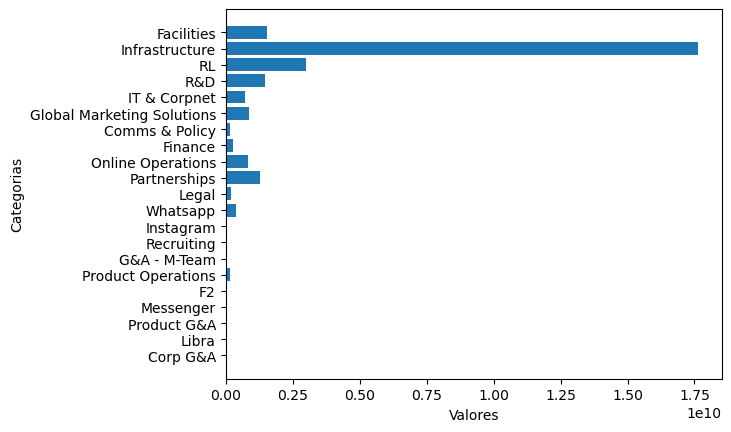

In [61]:
y = [fac_amount, infra_amount, rl_amount, rd_amount, it_amount,gms_amount,cp_amount,fi_amount,on_amount,partn_amount,legal_amount,wpp_amount,ig_amount,rec_amount,gma_amount,po_amount,f2_amount, mes_amount, pga_amount, libra_amount, cga_amount]
x = ['Facilities', 'Infrastructure', 'RL', 'R&D', 'IT & Corpnet', 'Global Marketing Solutions', 'Comms & Policy', 'Finance', 'Online Operations', 'Partnerships', 'Legal', 'Whatsapp', 'Instagram', 'Recruiting','G&A - M-Team', 'Product Operations','F2', 'Messenger', 'Product G&A', 'Libra', 'Corp G&A']
plt.barh(x,y)
plt.gca().invert_yaxis()

plt.xlabel('Valores')
plt.ylabel('Categorias')
plt.show()

In [62]:
infra=df[df['Business Unit'] == 'Infrastructure']
infra.index = range(infra.shape[0])

In [63]:
infra.head(2)

,Supplier Name,Normalized Supplier Name,Parent Supplier Name,Region,Requestor Name,Preparer Name,Level 1,Level 2,Level 3,Business Unit,Legal Entity,Cost Center,Cost Center (Base Level),Cost Center (Level 4),Cost Center (Level 5),Cost Center (Level 6),GL Desc (Level 4),GL Desc (Level 5),GL Desc (Level 6),Invoice ID,Invoice Number,Invoice Source,"Month, Day, Year of Payment Date",PO Number,Amount (USD),supplier_code,region_code
0,3BL MEDIA INC,3BL MEDIA INC,"3bl Media, LLC",NORAM,Marlo Tablante,Shivam Vakil,Energy & Utilities,Waste Management,Waste Disposal,Infrastructure,"Meta Platforms, Inc.","4350 - Design, Engineering & Construction Group","Design, Engineering & Construction Group",Infra R&D,Research & Development,Parent for Cost Center,Data Center Sustainability,Indirect COGS,Cost of Goods Sold,300002724744720,32840,SUPP_CONNECT,2023-05-11,7.000029e+10,11937.5,45,3
1,3BL MEDIA INC,3BL MEDIA INC,"3bl Media, LLC",NORAM,Marlo Tablante,Shivam Vakil,Professional Services,Public Relations,General Public Relations Programs & Services,Infrastructure,"Meta Platforms, Inc.","4350 - Design, Engineering & Construction Group","Design, Engineering & Construction Group",Infra R&D,Research & Development,Parent for Cost Center,Data Center Sustainability,Indirect COGS,Cost of Goods Sold,300002678259821,32271032272,SUPP_CONNECT,2023-04-13,7.000066e+10,30495.0,45,3


***Ou seja, mesmo que a unidade de "facilities" tenha um maior volume de compras, de longe a que apresenta maior montante de compra está relacionada com infraestrutura***

# Entendendo os demonstrativos financeiros e como eles se relacionam com a análise

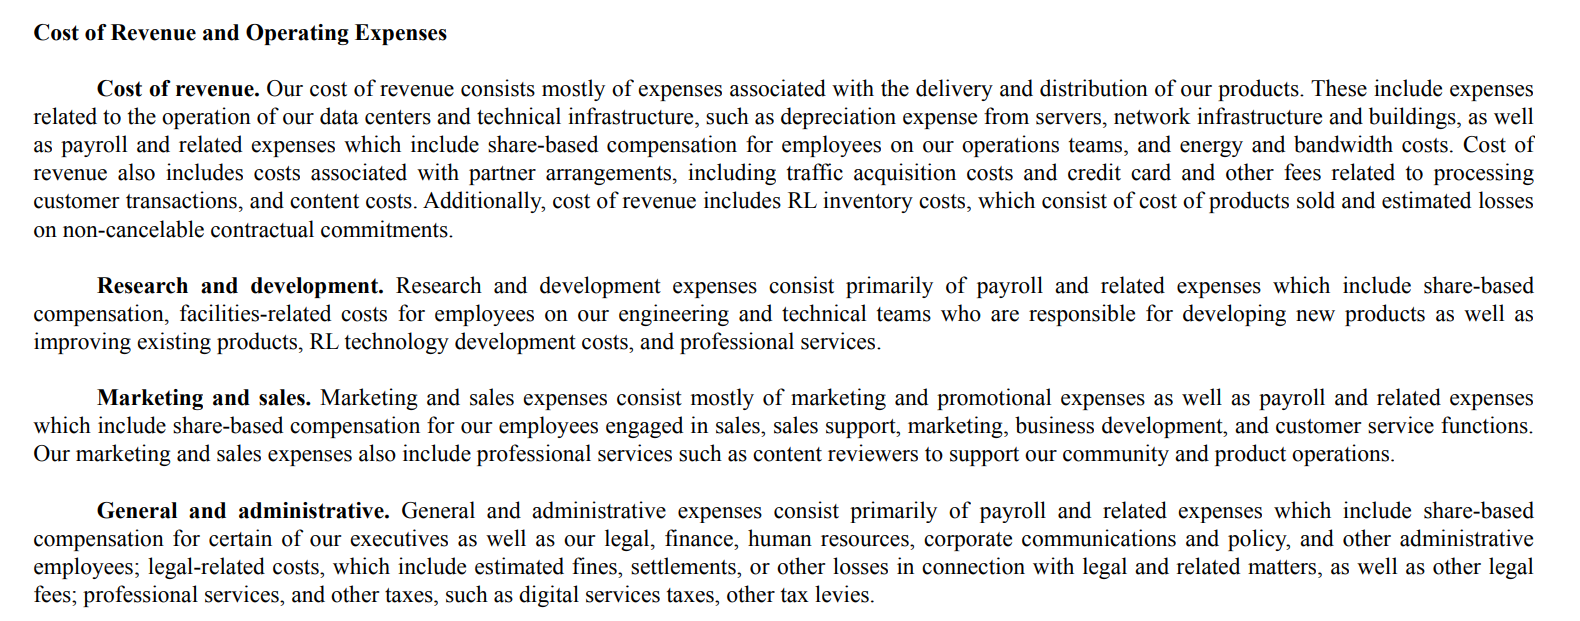

Buscando pela recorrência nas despesas

Primeiro vamos passar pela DRE (Demonstração de Resultados do Exercício)

Ela é estruturada da seguinte maneira 

**Receitas**

(-) COGS -> Se abrir https://d18rn0p25nwr6d.cloudfront.net/CIK-0001326801/e574646c-c642-42d9-9229-3892b13aabfb.pdf vai achar no nome de Cost of Revenue

**Lucro Bruto**

Despesas Operacionais (Recorrentes) - SG&A -> Geralmente Marketing entra aqui, despesas com R&D também

Outros - Despesas operacionais, mas não recorrentes -> consultoria para abertura de uma funcionalidade específica na empresa

**EBITDA ( Earnings Before Interest, Taxes, Depreciation and Amortization)** 

(-) Depreciação e Amortização

**EBIT** -> Famoso lucro operacional, ou seja, receita - custos - despesas 

(+/-) Resultado Financeiro

**EBT** -> Earning before taxes

(-) TAX (IR/CSLL)

**Net income (Lucro Líquido)**

Segundo, vamos entender como é estruturado o **Balanço Patrimonial** da empresa, pense em uma balança de fato
de um lado estão os ativos, que é aquilo que a empresa tem como direito ou investimento, e de outro como ela financia esse ativo
ou seja, dívida(passivos) ou patrimônio líquido (capital societário)


In [64]:
arr = []
values = []
for e in df['Requestor Name'].unique():
    arr.append(e)
    
for e in df['Requestor Name'].value_counts():
    values.append(e)

- Dividir o dataset em 3 grupos de centro de custos -> R&D e SG&A, todos entram no COGS, ou deveriam entrar...

In [65]:
# Aqui é possível observar quais são os requisitantes mais relevantes.
new_df = pd.DataFrame({'Requestor': arr, "Times":values})
new_df.sort_values(by="Times",ascending=False).head()

,Requestor,Times
0,Cara Brann,28182
1,Chloe Kwock,18877
2,Jess Jabbar,17935
3,Kiana Garner,8998
4,Michelle Hammond,8650


In [66]:
df['Month, Day, Year of Payment Date'] = pd.to_datetime(df['Month, Day, Year of Payment Date'])
df = df.rename(columns={'Month, Day, Year of Payment Date': 'Date'}) 
df.dtypes

C:\Users\Inteli\AppData\Local\Temp\ipykernel_17888\2348562128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month, Day, Year of Payment Date'] = pd.to_datetime(df['Month, Day, Year of Payment Date'])


Supplier Name                       object
Normalized Supplier Name            object
Parent Supplier Name                object
Region                              object
Requestor Name                      object
Preparer Name                       object
Level 1                             object
Level 2                             object
Level 3                             object
Business Unit                       object
Legal Entity                        object
Cost Center                         object
Cost Center (Base Level)            object
Cost Center (Level 4)               object
Cost Center (Level 5)               object
Cost Center (Level 6)               object
GL Desc (Level 4)                   object
GL Desc (Level 5)                   object
GL Desc (Level 6)                   object
Invoice ID                           int64
Invoice Number                      object
Invoice Source                      object
Date                        datetime64[ns]
PO Number  

In [67]:
# Observar o montante de compras ao longo dos meses
# Para isso, no X iremos plotar os meses e no Y o montante

df['Month'] = df['Date'].dt.month

In [68]:
# Todos os dados são de 2023
df['Year'] = df['Date'].dt.year

In [69]:
df_months = df.drop(['Supplier Name', 'Normalized Supplier Name' , 'Parent Supplier Name', 'Region', 'Requestor Name', 'Preparer Name', 'Level 1','Level 2','Level 3', 'Business Unit', 'Legal Entity','Cost Center', 'Cost Center (Base Level)','Cost Center (Level 4)', 'Cost Center (Level 5)', 'Cost Center (Level 6)', 'GL Desc (Level 4)', 'GL Desc (Level 5)', 'GL Desc (Level 6)', 'Invoice ID','Invoice Number','Invoice Source', 'Date','PO Number','supplier_code', 'region_code', 'Year'],axis=1)

In [70]:
df_months.head()

,Amount (USD),Month
1,349101.75,9
2,6936.00,5
3,-231826.73,8
4,55000.00,2
5,19796.00,8


In [71]:
jan = df_months[df_months['Month'] == 1].sum()[0]
fev = df_months[df_months['Month'] == 2].sum()[0]
mar = df_months[df_months['Month'] == 3].sum()[0]
apr = df_months[df_months['Month'] == 4].sum()[0]
mai = df_months[df_months['Month'] == 5].sum()[0]
jun = df_months[df_months['Month'] == 6].sum()[0]
jul = df_months[df_months['Month'] == 7].sum()[0]
ago = df_months[df_months['Month'] == 8].sum()[0]
set = df_months[df_months['Month'] == 9].sum()[0]
out = df_months[df_months['Month'] == 10].sum()[0]

arr_m = [jan, fev, mar, apr, mai, jun, jul, ago, set, out]

In [72]:
df_m = pd.DataFrame({'Amounts per month (USD)':arr_m, "Months": [1,2,3,4,5,6,7,8,9,10]})
# df_m = df_m.rename(columns={0:"Amounts per month (USD)"})
df_m

,Amounts per month (USD),Months
0,1.233931e+09,1
1,3.121596e+09,2
2,3.962561e+09,3
3,3.363225e+09,4
4,3.261520e+09,5
5,3.316018e+09,6
6,2.681560e+09,7
7,3.412800e+09,8
8,3.645376e+09,9
9,1.931730e+09,10


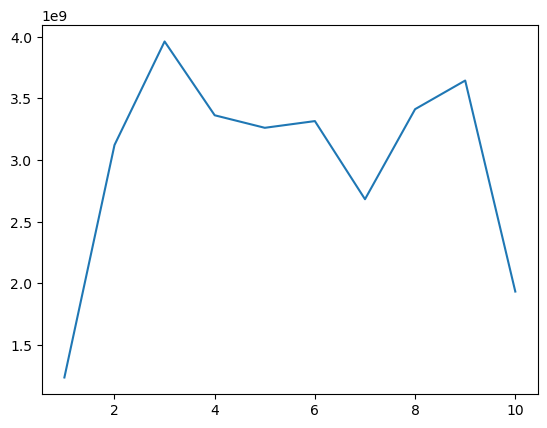

In [73]:
# Como está a sazonalidade do montante de compras por mês
plt.plot(df_m['Months'], df_m['Amounts per month (USD)'])

# Como está a vulnerabilidade do sistema? - Encontrar mais alternativas

In [74]:
# Limpando a tabela
df_cleaned = df.drop(['Cost Center (Level 6)','Invoice ID','Invoice Number','PO Number','Year'], axis = 1)
df_cleaned.head()

,Supplier Name,Normalized Supplier Name,Parent Supplier Name,Region,Requestor Name,Preparer Name,Level 1,Level 2,Level 3,Business Unit,Legal Entity,Cost Center,Cost Center (Base Level),Cost Center (Level 4),Cost Center (Level 5),GL Desc (Level 4),GL Desc (Level 5),GL Desc (Level 6),Invoice Source,Date,Amount (USD),supplier_code,region_code,Month
1,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Cara Brann,Jessica Shimshak,"Sales, Marketing & Events",Original Content,Original Content,R&D,"Meta Platforms, Inc.",5030 - DES(Facebook Org Central XFN),DES(Facebook Org Central XFN),Facebook R&D,Research & Development,Creative services,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,SUPP_CONNECT,2023-09-28,349101.75,19,3,9
2,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Chloe Kwock,Nicole Franco,"Sales, Marketing & Events",Original Content,Original Content,Global Consumer Marketing,"Meta Platforms, Inc.",2524 - Marketing - Creative,Marketing - Creative,Marketing & GX M&S,Marketing & Sales,Marketing Materials,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,SUPP_CONNECT,2023-05-13,6936.00,19,3,5
3,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Chloe Kwock,Princess Costello,"Sales, Marketing & Events",Original Content,Original Content,Global Consumer Marketing,"Meta Platforms, Inc.",2523 - Marketing - Company Brand,Marketing - Company Brand,Marketing & GX M&S,Marketing & Sales,Consultants,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,SIMANUAL,2023-08-10,-231826.73,19,3,8
4,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Jess Jabbar,Princess Costello,"Sales, Marketing & Events",Original Content,Original Content,Global Consumer Marketing,"Meta Platforms, Inc.",2524 - Marketing - Creative,Marketing - Creative,Marketing & GX M&S,Marketing & Sales,Other Marketing,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,SUPP_CONNECT,2023-02-16,55000.00,19,3,2
5,1ST AVE MACHINE USA INC,1ST AVE MACHINE USA INC,1st Ave Machine USA Inc.,NORAM,Kiana Garner,Nicole Franco,"Sales, Marketing & Events",Original Content,Original Content,Whatsapp,"Meta Platforms, Inc.",2939 - Marketing - WhatsApp,Marketing - WhatsApp,Marketing & GX M&S,Marketing & Sales,Creative services,Opex w/o Allocations & Interco,Operating Expenses w/o Allocations,SUPP_CONNECT,2023-08-12,19796.00,19,3,8


In [75]:
# coloquei algumas coisas na aba de "entendendo gl's"

In [76]:
df_cleaned['Invoice Source'].unique()

array(['SUPP_CONNECT', 'SIMANUAL', 'SC_UPLOAD', 'OCR', 'LETTERBOX', 'TEM',
       'CAFEPRO', 'Manual Invoice Entry', 'ERS'], dtype=object)

In [77]:
# Convertendo as fontes para o tipo numérico
df_cleaned['source_code'] = df_cleaned['Invoice Source'].astype("category").cat.codes

In [78]:
df_cleaned['source_code'].unique()

array([7, 6, 5, 4, 2, 8, 0, 3, 1], dtype=int8)

In [79]:
source_x_amount = pd.DataFrame(data={'Source': df_cleaned['source_code'], 'Amount':df_cleaned['Amount (USD)']})

In [80]:
source_x_amount.sort_values(by="Source", ascending=True)

,Source,Amount
568259,0,105.000000
596356,0,1984.050000
596357,0,248.250000
596358,0,464.080000
596359,0,57.570000
...,...,...
432453,8,83809.133825
432454,8,138666.622917
432456,8,136236.484973
817909,8,53223.163870


In [81]:
source_x_amount_agregado = source_x_amount.groupby('Source')['Amount'].sum().reset_index()

In [82]:
source_x_amount_agregado = source_x_amount_agregado.rename(columns={0:"CAFEPRO",1:"ERS",2:"LETTERBOX",3:"Manual Invoice Entry",4:"OCR",5:"SC_UPLOAD",6:"SIMANUAL",7:"SUPP_CONNECT",8:"TEM"})

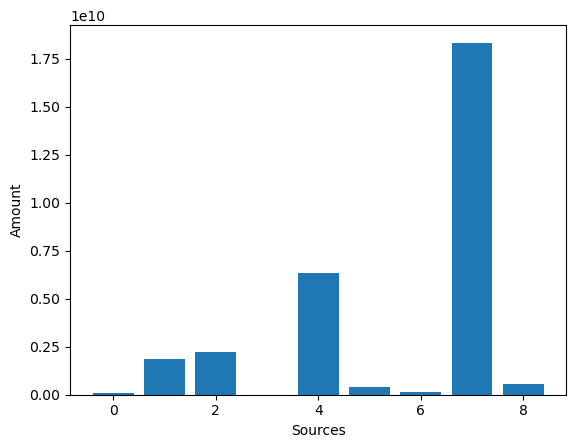

In [83]:
plt.bar(source_x_amount_agregado['Source'], source_x_amount_agregado['Amount'])
plt.xlabel("Sources")
plt.ylabel("Amount")
plt.show()

In [84]:
# Uma coisa que notei é que algumas fontes apresentam valores negativos, seria isso um erro na classificação da conta ou de planilhamento?
# Mas quantos desses valores são realmente negativos?
vetor = 0

for e in df['Amount (USD)']:
    if e < 0:
        vetor += 1
        
print(f'Foram classificados como montantes menores que zero {vetor} contas')

Foram classificados como montantes menores que zero 6948 contas


Até agora vcs tem algo a complementar/dúvidas?